### Установка пакетов

In [8]:
!pip install pyspark

### Импорт библиотек

In [9]:
import json
import os
import pandas as pd
from pyspark.mllib.stat import Statistics
from pyspark.sql import SparkSession
import random
import seaborn

### Генерация номера задания

In [10]:
# random.randint(1, 200)

Сгенерирован номер с заданием 99

### Создание каталога data для хранения данных

In [11]:
if not os.path.exists('data'):
  os.makedirs('data')

### Создание экземпляра SparkSession

In [12]:
spark = SparkSession.builder.appName('Homework_3_lab3').getOrCreate()

### Задание 1. Считать файл 3.csv и создать Spark DataFrame

In [13]:
df = spark.read.format('csv').option('header', 'true').load('data/3.csv')
df.show(5)

+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+---+------+
|         feature_1|        feature_2|        feature_3|         feature_4|        feature_5|         feature_6|        feature_7| id|target|
+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+---+------+
|   81.568884059438|82.36979754168003|60.71253270065398|25.617585218753277| 93.4645410649085| 41.49496997095485|79.80704983146745|  0|     0|
|56.926075076871776|69.11311031578656|94.08326883815171| 82.63424200890779|29.56056850319256|36.122091211938056|44.91953982429817|  1|     1|
| 77.83976077040425|71.89828518091579|92.12729470348296| 70.77410482963722|98.83549262429456| 76.91246851520349|78.97424208042696|  2|     1|
|56.568991946500844|46.23578490255626|64.12721128693505| 96.56454416123493| 47.3943861260651| 66.23480773897428|47.99562453239296|  3|     0|
|36.83

### Задание 2. Подготовьте данные для дальнейше работы

In [14]:
df_features = df.select([f"feature_{index + 1}" for index in range(7)])
df_features.show(5)

+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+
|         feature_1|        feature_2|        feature_3|         feature_4|        feature_5|         feature_6|        feature_7|
+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+
|   81.568884059438|82.36979754168003|60.71253270065398|25.617585218753277| 93.4645410649085| 41.49496997095485|79.80704983146745|
|56.926075076871776|69.11311031578656|94.08326883815171| 82.63424200890779|29.56056850319256|36.122091211938056|44.91953982429817|
| 77.83976077040425|71.89828518091579|92.12729470348296| 70.77410482963722|98.83549262429456| 76.91246851520349|78.97424208042696|
|56.568991946500844|46.23578490255626|64.12721128693505| 96.56454416123493| 47.3943861260651| 66.23480773897428|47.99562453239296|
|36.839894444284454|50.57873834480455|66.55775365417674| 83.47393185879885|98.96916

### Задание 3. Рассчитать и вывести матрицу корреляций для признаков

In [15]:
corr_matrix = Statistics.corr(df_features.rdd.map(lambda row: row[0:]), method='pearson')

df_corr = pd.DataFrame(corr_matrix)
df_corr.index = df_features.columns
df_corr.columns = [f'feature_{index + 1}' for index in range(7)]

df_corr.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
feature_1,1.000000,0.007522,-0.022711,0.018306,0.027320,0.031992,0.062323
feature_2,0.007522,1.000000,-0.035025,-0.005601,-0.032884,-0.040134,0.044931
feature_3,-0.022711,-0.035025,1.000000,-0.005110,-0.028036,-0.017352,0.023074
feature_4,0.018306,-0.005601,-0.005110,1.000000,-0.021843,-0.062701,-0.024418
feature_5,0.027320,-0.032884,-0.028036,-0.021843,1.000000,-0.002719,-0.025963


### Задание 4. Построить диаграмму типа Scatter для визуализации корреляционных связей

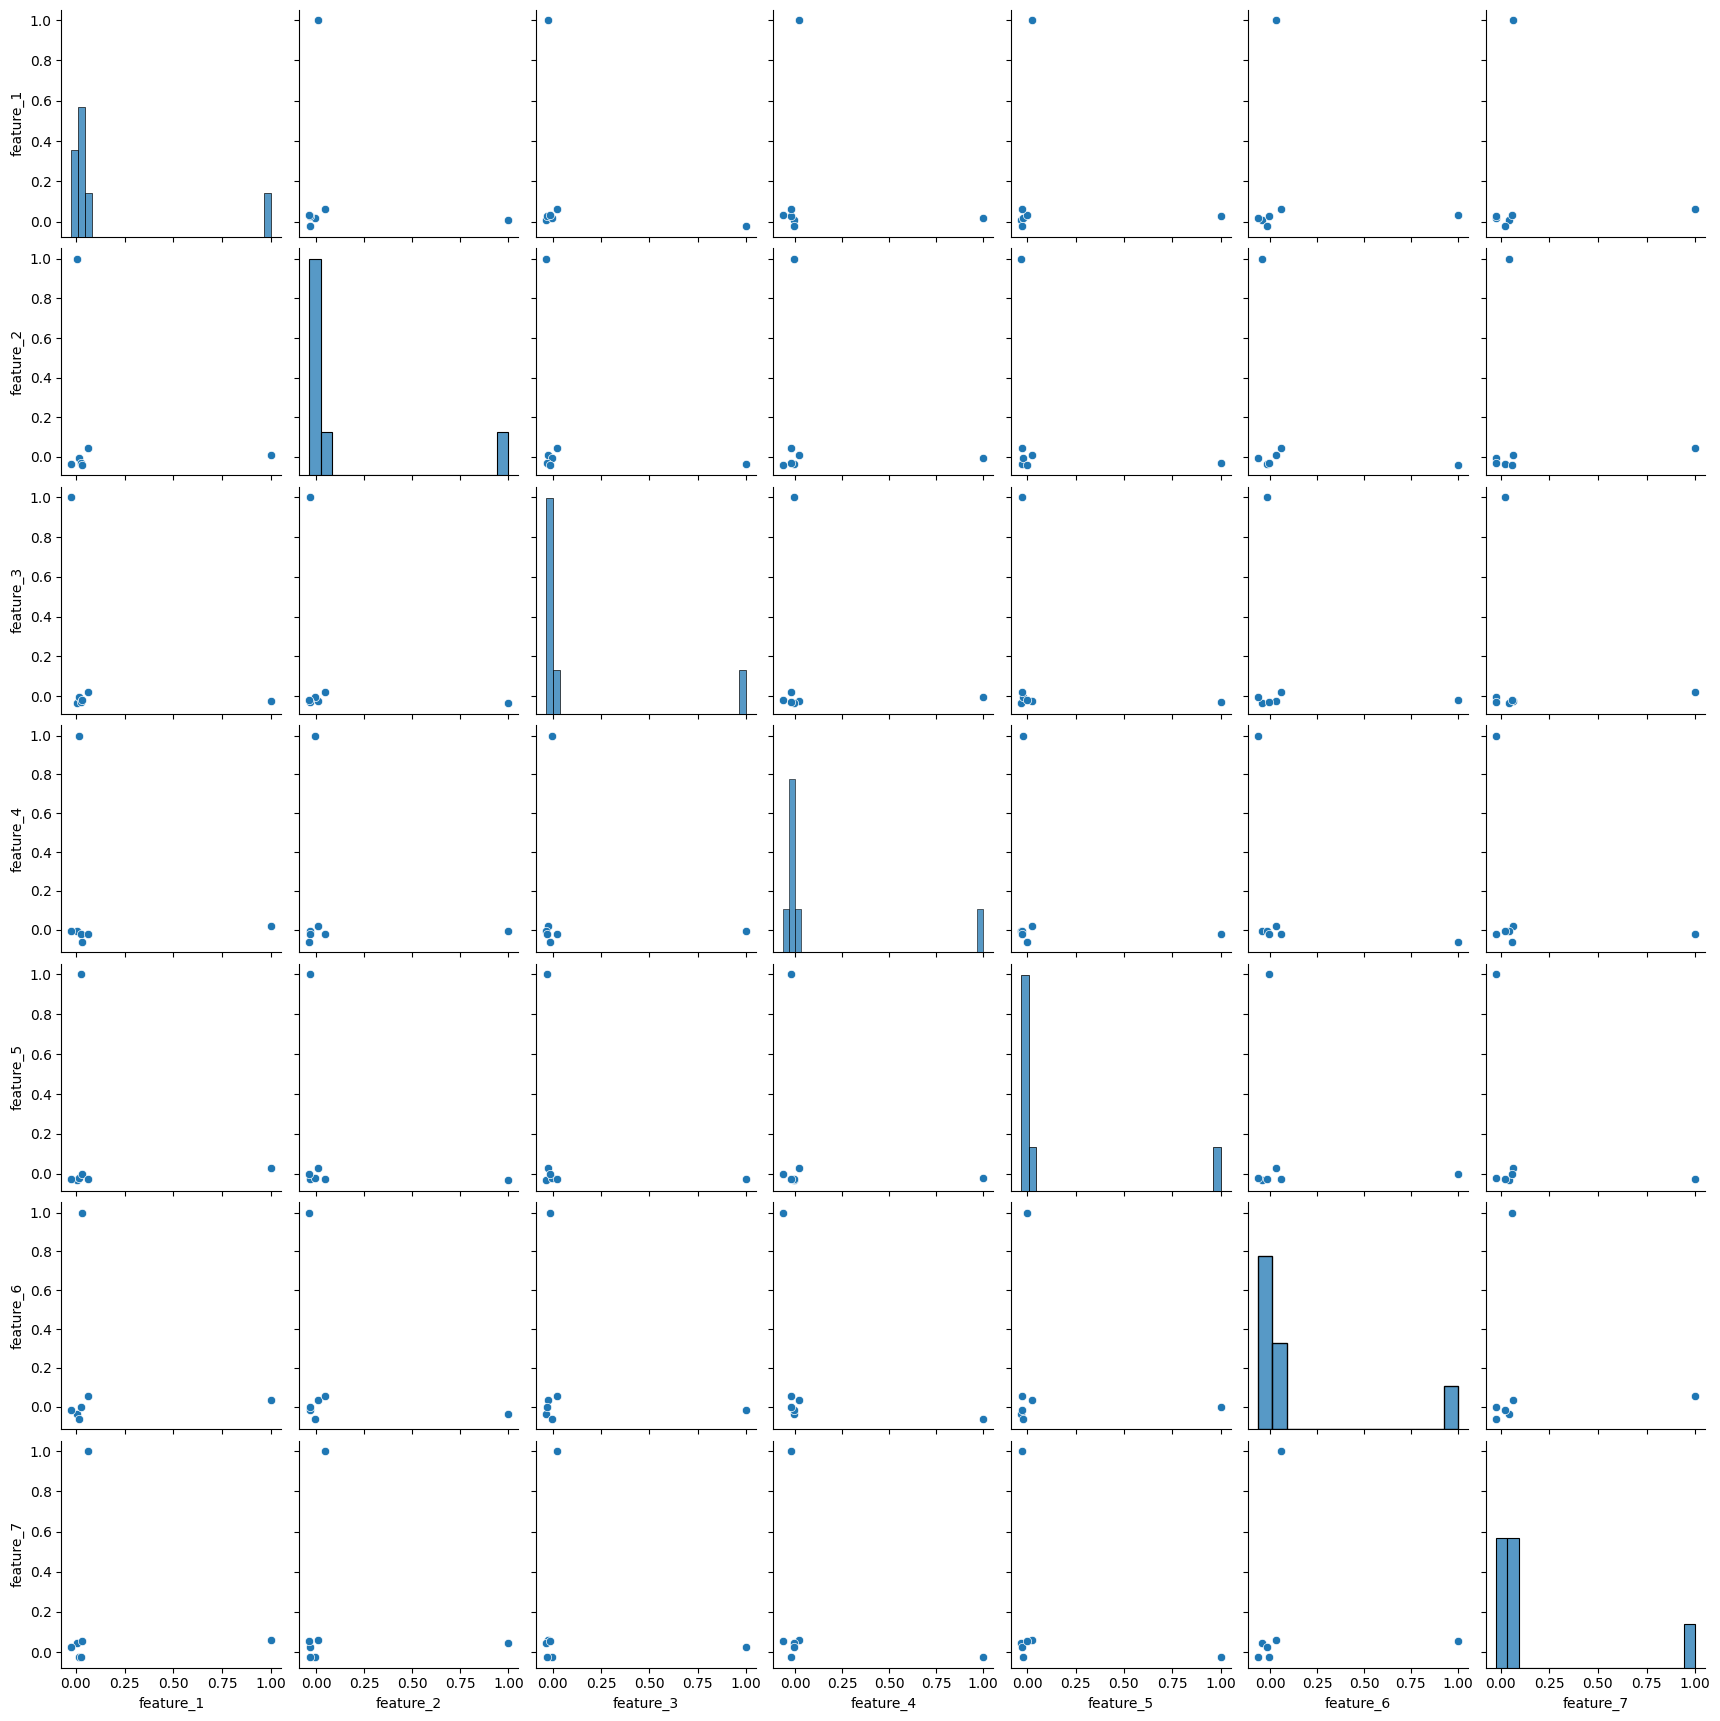

In [16]:
seaborn.pairplot(pd.DataFrame(df_corr))

### Задание 5. Записать полученные данные в файл (п. 3)

In [17]:
df_corr.to_json('data/r_3.json')